# Informe

**Tema:**

Modelo de predicción de la severidad de accidentes de tráfico basado en el entorno y factores climáticos


**Grupo 22**

**Integrantes:**
*   Camila Fuentes
*   Benjamín San Martin
*   Diego Faúndez
*   Felipe Mellado
*   Javier Kauer

**Fecha de Entrega:**
19 de julio 2023



# Introducción



¿Es posible predecir la severidad de un accidente en función de los factores del entorno? pregunta de investigacion

En la era moderna, el automóvil se ha posicionado como uno de los medios de transporte más populares a nivel mundial. Junto con esto, los accidentes relacionados a esta forma de movilización se mantienen como una preocupación constante para usuarios, fabricantes y demás entidades relacionadas. Esto último genera una constante necesidad de estudiar las razones por las que estos accidentes se provocan, llevando a empresas y entidades de gobierno a gastar millones cada año en analizar las causas para posteriormente solucionar.
En este proyecto, se buscará estudiar como los factores ambientales y del entorno afectan a los accidentes vehiculares mediante el analisis de como estos factores repercuten en la severidad del accidente.
Analizando una base de datos que contiene accidentes vehiculares ocurridos en Estados Unidos entre los años 2016 y 2021, se buscará generar un modelo que permita predecir la severidad de un accidente, en base a los diferentes factores del entorno al momento de ocurrido. Estos factores van desde meramente ambientales, como la velocidad del viento o la presencia de lluvia, a relacionados con la ruta y el entorno, como la presencia de señales de tráfico o la cercanía a una vía de tren.
Esto permitirá obtener una amplia gama de factores que puedan influir de mayor o menor manera en un accidente y se pueda predecir con mayor precisión la gravedad de un posible accidente en base a esos factores.

## Limpieza de Datos:

La limpieza de datos se hizo en 2 fases. El primero corresponde a la etapa de limpieza del database, y el segundo corresponde a la selección de datos.

En la primera etapa del proyecto, se llevó a cabo la limpieza de los datos para asegurar su utilidad. Se utilizó Python y Jupyter Notebook para realizar este proceso y se aplicó un criterio para determinar qué columnas eran relevantes, basado en: la ambigüedad de los datos, su falta de relevancia para el estudio y la prevalencia de un tipo de dato en particular. Como resultado, se seleccionaron las siguientes 24 columnas para eliminar del dataset: "End-Time", "Start_Lat", "End_Lat", "End_Lng", "Distance(mi)", "Description", "Number", "Side", "County", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Direction", "Amenity", "No_Exit", "Roundabout", "Station", "Traffic-Calming", "Turning_Loop", "Civil_Twilight", "Nautical_Twilight" y "Astronomical_Twilight".

A continuación, debido a la gran cantidad de datos en el dataset, se eliminaron las filas que contenían valores nulos. Después se convertieron los valores del sistema imperial al sistema internacional de unidades (SI), creando cuatro funciones que transforman millas por hora a kilómetros por hora, grados Fahrenheit a grados Celsius, millas a kilómetros, y pulgadas de agua a pascales. Se aplicaron estas funciones a las columnas "Temperature(F)", "Wind_Chill(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)" y "Precipitation(in)" utilizando el método "apply" de Pandas. Luego, se renombraron estas columnas para reflejar las unidades de medida actualizadas.

Después, utilizando el método "split" de strings, se crearon tres nuevas columnas a partir de la columna "Start_Time" obteniendo en columnas apartes la fecha y la hora. Siguiente la columna "date" se convirtió al tipo datetime utilizando el método "to_datetime". Después, se creó una nueva columna "year" extrayendo el año de la columna "date". Posteriormente, la columna "Start_Time" se eliminó. Finalmente se guardó el archivo en un archivo .csv.

Con respecto a la segunda fase de los datos, en un principio, se tenía pensado seleccionar una cantidad aleatoria de datos por año entre el 2019 y el 2019, específicamente 20.0000, para trabajar en el posterior análisis exploratorio. Pero debido a la sobrerepresentación de datos con severidad 2, es imposible hacer un análisis exploratorio y mucho menos un modelo predictivo, pues todos los datos estarían inclinados a ser de severidad 2. Por lo anterior se decidió cambiar la metodología en el trabajo de los datos.
A continuación se presenta la sobrerepresentación de datos anteriormente descrita.

In [ ]:
hist(datos$Severity)

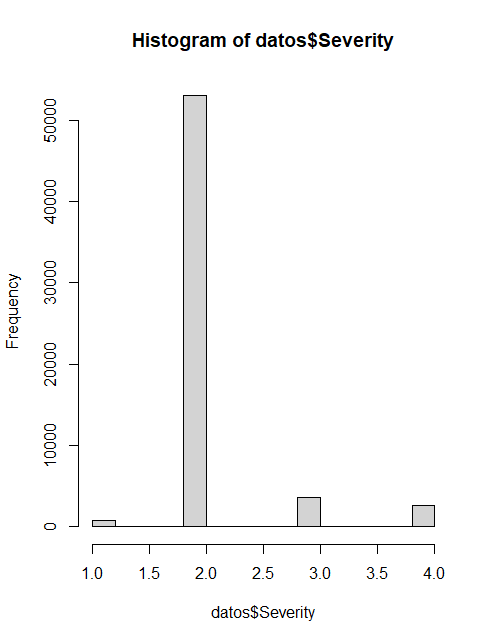

## Análisis Exploratorio

En primer lugar, se llevó a cabo una reorganización de los grupos clasificacados por severidad, en las que se separaron los niveles 1 y 2 de los niveles 3 y 4, los que posteriormente se renombraron como "Minor accident" y "Serious accident" respectivamente. Luego, de estos dos grupos, se escogieron 50.000 datos de cada uno para poder comenzar el análisis exploratorio, lo anterior genera un sesgo en el modelo debido a que se ajustó la distribución de clases del conjunto de datos. Esta decisión se tomó debido a la necesidad de poder predecir severidades mayores, por lo que el sesgo fué necesario para que el modelo fuera mas uniforme y evitara la clara predominancia de la severidad 2. La creación de estos archivos se pueda observar en los códigos del anexo 1.

Una vez obtenido un dataset en donde esté mejor distribuidos los datos, se puede comenzar a hacer un análisis exploratorio. Para comenzar, debido a la gran cantidad de variables, se hizo la matriz de correlación para poder observar las posibles relaciones entre ellas. Después se hicieron gráficos con el objetivo de mostrar el comportamiento de las distintas variables en función de la severidad del accidente.

Se observa la matriz de correlación antes y después de aplicar el ajuste a los datos:
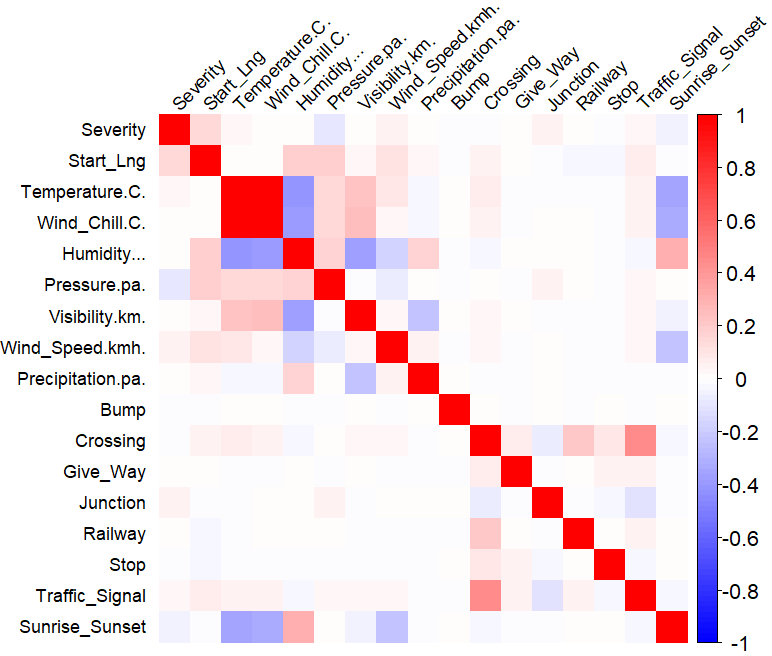
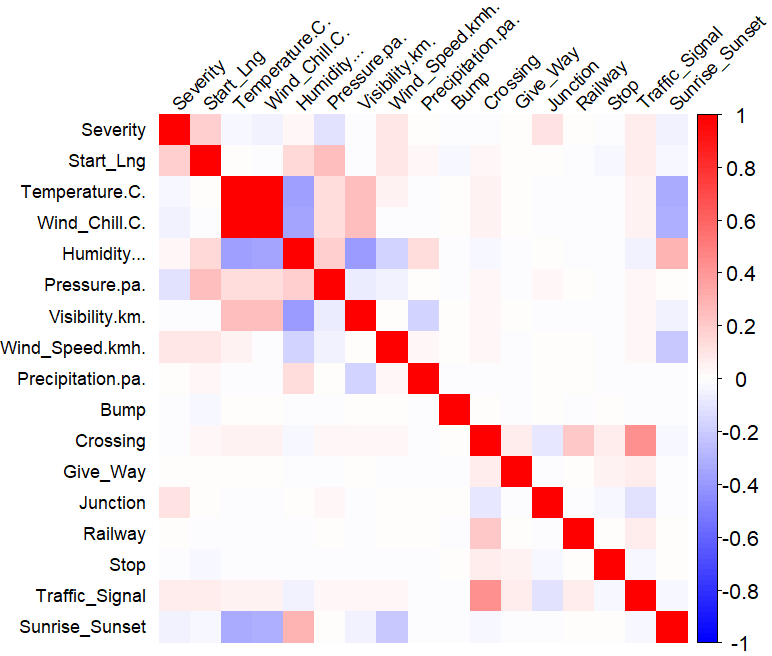


Tal como se puede observar, ambas matrices se ven de iguales en forma general salvo algunas pequeñas diferencias. Estas difefrencias por ejemplo se encuentra en la relación de "Temperature.C.", "Wind_Chill.C.", y "Humidity" con "Severity", ya que al hacer el undersampling, esta relación disminuyes, los
actualizar

Para comenzar, en el anexo 2 se muestra la cantidad de accidentes que se tienen en función del clima, entre los dos valores de severidad. A primera vista se observa que el comportamiento de la severidad es bastante similar en los distintos climas posibles. El código para generar el gráfico se muestra a continuación:

El siguiente gráfico mostrado corresponde a un boxplot de la distribución de la severidad de accidentes en función de la temperatura. La mayoría de gráficos de este tipo, con las varibles relacionadas al clima, tenían un comportamiento similar, sin ninguna relación demasiado evidente. El código para generar este gráfico es el mostrado a continuación.



In [ ]:
ggplot(data, aes(x = factor(Severity), y = Temperature.C., fill = factor(Severity))) +
  geom_boxplot(alpha = 1, notch = FALSE) +
  scale_fill_discrete(name = "Severidad") +
  labs(title = "Relación entre severidad y temperatura",
       x = "Severidad",
       y = "Temperatura")

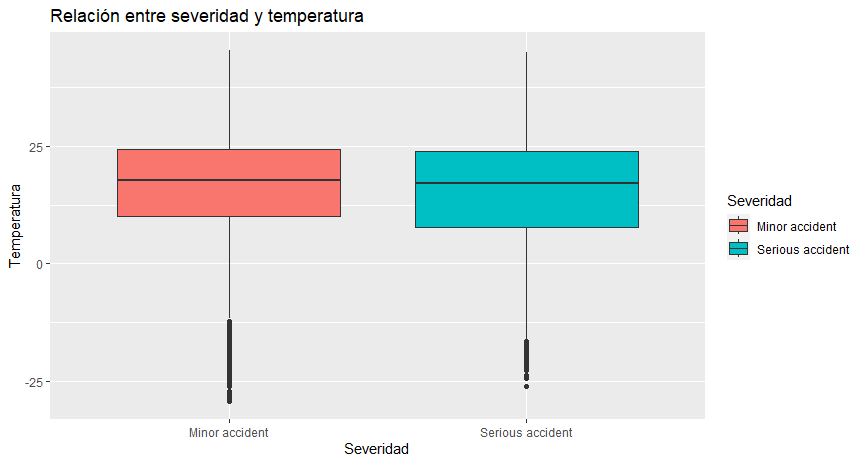

El siguiente gráfico corresponde a la cantidad de severidad del accidente en función de si es día o noche. Se puede observar que la proproción de la severidad de los accidente se mantiene relativamente similar entre el día y la noche.

In [ ]:
ggplot(data, aes(x=Severity, fill=Sunrise_Sunset)) +
  geom_bar(position="dodge")
labs(x="Severity", y="Cantidad")

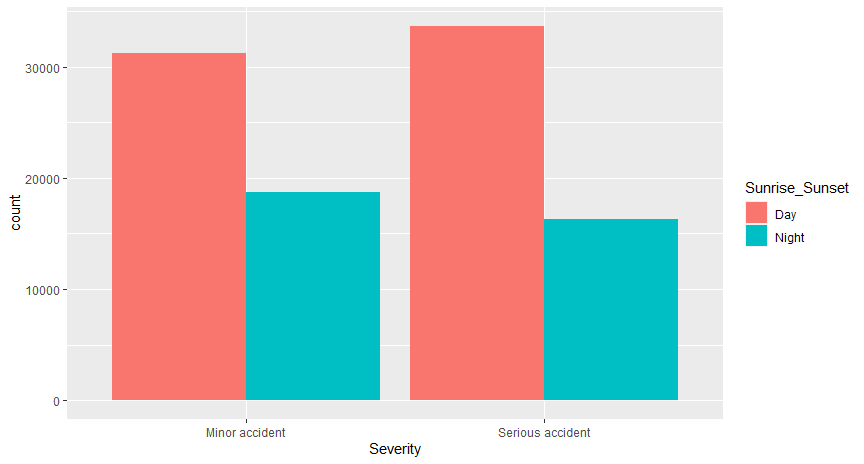

Para terminar, como "Minor accident" y "Serious accident" corresponden a una clase binaria, se decició cambiar estos valores por 0 y 1 respectivamente.

## Preguntas y Problemas

Las preguntas surgidas basandose en el análisis exploratorio son las siguientes:



1. Ocupando los datos balanceados mediante undersampling, ¿Se puede generar un modelo de predicción aceptable de la severidad de un accidente en base a las cualidades del entorno?
2.  ¿Qué tanto varían las métricas estadísticas de un modelo desbalanceado a uno balanceado?
3. ¿Existen patrones comunes entre los accidentes al evaluar las condiciones del entorno?


# Propuesta Experimental

## Pregunta 1

Para el entrenamiento, se utilizará el dataset balanceado y depurado en el hito 1 mediante undersampling. Se dividirá este conjunto en un 70% para entrenamiento y un 30% para testing. Con este conjunto de entrenamiento, se generará un modelo que intentará predecir la severidad de ciertos accidentes basándose en los factores del entorno, que consisten en valores numéricos y booleanos.

Se utilizarán dos clasificadores para este entrenamiento, Decision Tree y KNN, tras lo cual se compararán los resultados que se obtengan de cada uno y se sacará una conclusión a partir del modelo que muestre un mejor desempeño.

## Pregunta 2

Para responder esta pregunta, se realizarán un nuevo entrenamiento, similar al de la pregunta anterior, con los mismos parametros y utilizando los mismos clasificadores, pero utilizando el dataset sin undersampling. Cuando el nuevo modelo esté completo, se realizará una comparación de resultados para cada clasificador, con el modelo de la pregunta anterior y se verá las diferencias en las metricas de ambos.


#Pregunta 3


Para responder esta pregunta se ocupará todos los atributos del dataset. Además se usarán el dataset con los datos sin undersampling, de tal forma se obtienen los valores reales. Después, se tendría que ocupar el método del codo para obtener la cantidad óptima de clusters. A continuación se ocupará K-Means, con la cantidad de grupos del paso anterior, para hacer la separación de los datos. Finalmente para gráficar esto, se ocupará PCA reduciendo el dataset a 2 dimensiones y se hará una visualización de los clusters.

# Implementación

Enlaces a las bases para que pueda correr el código, es importante que se guarden con el nombre que sale en el código.
1. https://drive.google.com/file/d/1v05m3ViHbBn8hLS7X8i9YAXY-RWcGNCp/view?usp=sharing
2. https://drive.google.com/file/d/14mrEsnR_BNpS--G4v7YtfknbrqsKu-f6/view?usp=sharing

## Pregunta 1
Ocupando los datos balanceados mediante undersampling, ¿Se puede generar un modelo de predicción aceptable de la severidad de un accidente en base a las cualidades del entorno?

La implementación se encuentra en el anexo 3.

A continuación están los resultados del modelo:

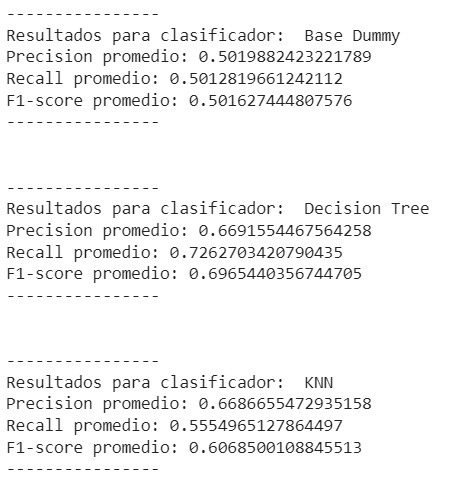

### Conclusión Pregunta 1:



Debido a los resultados obtenido en la implementación de la pregunta 1, aún tomando el algoritmo con los mejores resultados, no se puede concluir que el modelo de predicción tenga un correcto funcionamiento, ya que sus metricas en el mejor modelo (Decision Tree) no superan el 75%, lo cual aunque es considerablemente mejor que el Base Dummy, no es suficiente para predecir consistentemente la severidad del accidente. Queda a criterio del usuario ver si le será útil el modelo o no.

## Pregunta 2
¿Qué tanto varían las métricas estadísticas de un modelo desbalanceado a uno balanceado?

La implementación se encuentra en el anexo 4.

A continuación se muestra los resultados obtenidos al correr el código de más arriba:

| Modelo con undersampling:| Modelo sin undersampling |
| ----------- | ----------- |
 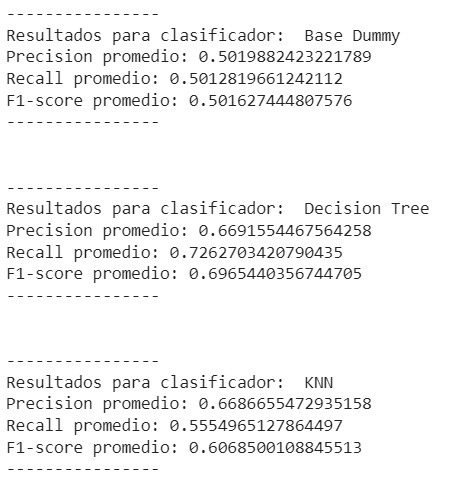 | 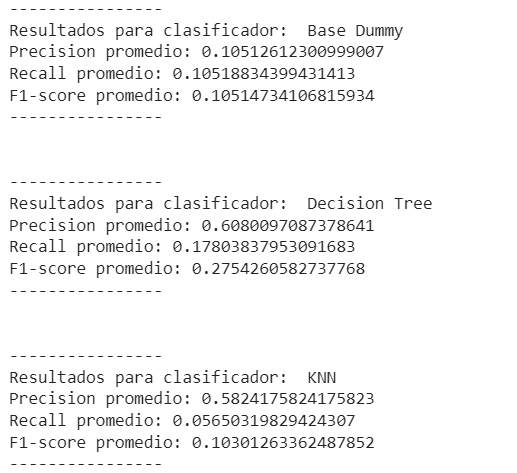
|

      


#### Conclusión Pregunta 2:

Al realizar el nuevo modelo con los datos sin undersampling se nota que para ambos clasificadores la precisión baja un poco, mientras que los demás indicadores muestran una caída enorme. De esto se concluye que el undersampling permite generar modelos que sean más fidedignos a la hora de ser utilizados y por ende fue una buena decisión haberlo realizado en este proyecto, ya que el nuevo modelo obtenido en esta pregunta es derechamente inutil para cualquier uso práctico o de análisis.

## Pregunta 3
¿Existen patrones comunes entre los accidentes al evaluar las condiciones del entorno?

La implementación se encuentra en el anexo 5.

A continuación se presentan los resultados obtenidos. En el primer gráfico se obtiene los resultados al aplicar el método del codo, y en el segundo gráfico los resultados al visualizar los 5 clusters usando PCA:

| Método del Codo| Visualización K-Means con 5 clusters |
| ----------- | ----------- |
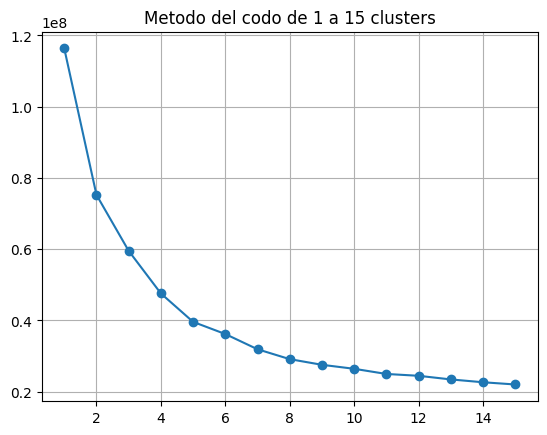 | 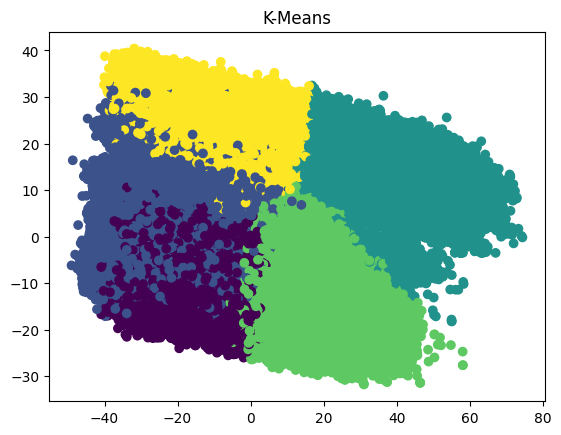

### Conclusión Pregunta 3:

Tal como se puede observar en los gráficos obtenidos, se puede observar que si bien se pueden crear clusters de accidentes. Estos clusters estan tan cercas unos de otros que no se podría establecer que existen clusters distintos entre si. Una de las razones por la cual se puede dar este compartamiento puede ser por la propia naturaleza de los datos que se están usando. Puesto que como los accidentes ya son un suceso que ocurre con poca probabilidad, las condiciones ambientales del accidente también se comportarían de forma aleatoria sin un patron en común.

# Anexo

### 1 Limpieza de datos

In [ ]:
import pandas as pd

PATH = r"US_Accidents_Dec21_updated.csv"

df = pd.read_csv(PATH, memory_map= True)

df = df.drop(["End_Time", "Start_Lat","End_Lat", "End_Lng", "Distance(mi)",
              "Description", "Number", "Side", "County", "Zipcode", "Country",
              "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Direction",
              "Amenity", "No_Exit","Roundabout","Station", "Traffic_Calming",
              "Turning_Loop", "Civil_Twilight", "Nautical_Twilight",
              "Astronomical_Twilight"], axis=1)

df = df.dropna(how="any", axis=0)

def mph_to_kmh(mph):
    kmh = mph*1.60934
    return kmh

def ftoc(f):
    c = (5/9)*(f-32)
    return c

def mitokm(mi):
    km = mi*1.60934
    return km

def intopa(inches):
    pa = inches*0.32201
    return pa

df["Temperature(F)"] = df["Temperature(F)"].apply(ftoc)
df["Wind_Chill(F)"] = df["Wind_Chill(F)"].apply(ftoc)
df["Pressure(in)"] = df["Pressure(in)"].apply(intopa)
df["Visibility(mi)"] = df["Visibility(mi)"].apply(mitokm)
df["Wind_Speed(mph)"] = df["Wind_Speed(mph)"].apply(mph_to_kmh)
df["Precipitation(in)"] = df["Precipitation(in)"].apply(intopa)

df = df.rename(columns={"Temperature(F)": "Temperature(C)", "Wind_Chill(F)" :
                        "Wind_Chill(C)", "Pressure(in)" : "Pressure(pa)",
                        "Visibility(mi)" : "Visibility(km)", "Wind_Speed(mph)"
                        : "Wind_Speed(kmh)", "Precipitation(in)" : "Precipitation(pa)"})

df[['date', 'time']] = df['Start_Time'].str.split(' ', expand=True)
df["date"]= pd.to_datetime(df["date"])
df['year'] = df['date'].dt.year
df = df.drop("Start_Time", axis=1)

PATH1 = r"C:\Users\kauer\OneDrive - Universidad de Chile\U\7mo Semestre\CC5205\
proyecto\datos_limpios.csv"

df.to_csv(PATH1, index=False)


In [ ]:
import csv

with open("datos_limpios.csv") as csvfile:

    reader = csv.reader(csvfile)

    csv1y2 = open("sev1y2.csv", "a", newline="")
    writer1y2 = csv.writer(csv1y2)

    csv3y4 = open("sev3y4.csv", "a", newline="")
    writer3y4 = csv.writer(csv3y4)

    for row in reader:
        if row[1] == '1' or row[1] == '2':
            new_row = [row[0]] + ["Minor accident"] + row[2:]
            writer1y2.writerow(new_row)

        if row[1] == '3' or row[1] == '4':
            new_row = [row[0]] + ["Serious accident"] + row[2:]
            writer3y4.writerow(new_row)

In [ ]:
import csv
import random as rn

with open("sev1y2.csv") as csv1y2:
    reader = csv.reader(csv1y2)

    muestra = list(reader)

    random_pick = rn.sample(muestra, 50000)

    csvfinal = open("DatosFinales.csv", "a", newline="")
    writerfinal = csv.writer(csvfinal)

    for row in random_pick:
        writerfinal.writerow(row)

In [ ]:
import csv
import random as rn

with open("sev3y4.csv") as csv3y4:
    reader = csv.reader(csv3y4)

    muestra = list(reader)

    random_pick = rn.sample(muestra, 50000)

    csvfinal = open("DatosFinales.csv", "a", newline="")
    writerfinal = csv.writer(csvfinal)

    for row in random_pick:
        writerfinal.writerow(row)

### 2 Distribución severidad y condiciones del clima

In [ ]:
ggplot(data, aes(x=Severity, fill=Weather_Condition)) +
  geom_bar(position="dodge")
labs(x="Severity", y="Cantidad")

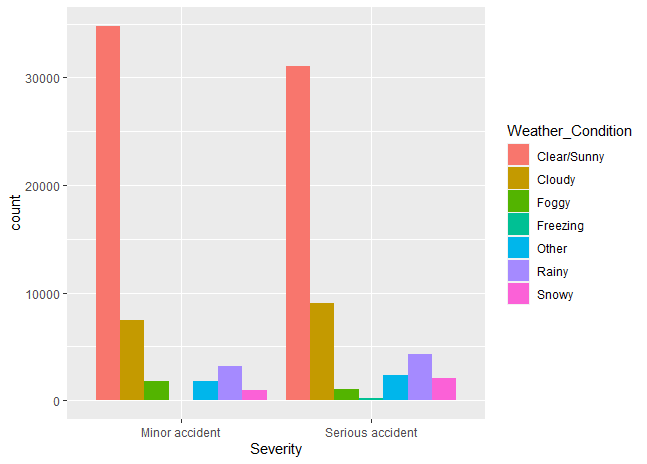

### 3 Implementación pregunta 1

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier #kNN
import numpy as np

#Carga de bases de datos.
df = pd.read_csv('Datos_finales_arreglados_con_undersampling_int.csv', encoding='utf-8')
df2 = pd.read_csv('Datos_finales_arreglados_sin_undersampling_int.csv', encoding='utf-8')

atributos = ["Start_Lng", "Temperature.C.", "Wind_Chill.C.", "Humidity...", "Pressure.pa.",
             "Wind_Speed.kmh.", "Junction", "Traffic_Signal", "Sunrise_Sunset"]


def run_classifier(clf, X, y, num_tests=10):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions))
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    return metrics

y = df['Severity'].to_numpy()
X = df.drop('Severity', axis=1).to_numpy()

c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c2 = ("KNN", KNeighborsClassifier(n_neighbors=10))

classifiers = [c0, c1, c2]

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X, y)   # hay que implementarla en el bloque anterior.
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ", name)
    print("Precision promedio:", np.array(metrics['precision']).mean())
    print("Recall promedio:", np.array(metrics['recall']).mean())
    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("----------------\n\n")


----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.5019882423221789
Recall promedio: 0.5012819661242112
F1-score promedio: 0.501627444807576
----------------


----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.6691554467564258
Recall promedio: 0.7262703420790435
F1-score promedio: 0.6965440356744705
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.6686655472935158
Recall promedio: 0.5554965127864497
F1-score promedio: 0.6068500108845513
----------------




### 4 Implementación pregunta 2

In [ ]:
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier #kNN
import numpy as np


# Carga de bases de datos
df = pd.read_csv('Datos_finales_arreglados_con_undersampling_int.csv', encoding='utf-8')
df2 = pd.read_csv('Datos_finales_arreglados_sin_undersampling_int.csv', encoding='utf-8')

# Función para probar los classifiers
def run_classifier(clf, X, y, num_tests=10):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}

    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions))
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    return metrics

# Crear los conjuntos correctamente
y = df2['Severity'].to_numpy()
X = df2.drop('Severity', axis=1).to_numpy()

# Creación de clasificadores
c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c2 = ("KNN", KNeighborsClassifier(n_neighbors=10))

classifiers = [c0, c1, c2]

# Obtener los resultados

print("Sin Undersampling")
results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X, y)   # hay que implementarla en el bloque anterior.
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ", name)
    print("Precision promedio:", np.array(metrics['precision']).mean())
    print("Recall promedio:", np.array(metrics['recall']).mean())
    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("----------------\n\n")

(100000, 17)
(90000, 17)
Sin Undersampling
----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.10512612300999007
Recall promedio: 0.10518834399431413
F1-score promedio: 0.10514734106815934
----------------


----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.6080097087378641
Recall promedio: 0.17803837953091683
F1-score promedio: 0.2754260582737768
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.5824175824175823
Recall promedio: 0.05650319829424307
F1-score promedio: 0.10301263362487852
----------------




### 5 Implementación pregunta 3

In [8]:
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

random_state = 20

#Carga de bases de datos.
df = pd.read_csv('Datos_finales_arreglados_con_undersampling_int.csv', encoding='utf-8')
X1 = df.dropna(axis=0, how='any', inplace=False).to_numpy()


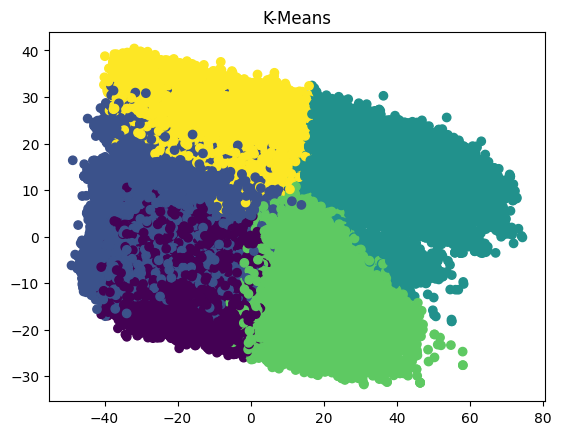

In [9]:
kmeans = KMeans(n_clusters=5, random_state=20,n_init='auto').fit(X1)
y_pred = kmeans.predict(X1)
new_X = PCA(n_components=2, random_state=20).fit_transform(X1)
plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

### Contribución

##### Hito 1:
Camila Fuentes:
*   Hizo la matriz de correlación
*   Ayudó con la presentación
*   Ayudó con los gráficos de tipo boxplot

Benjamín San Martin

*  Particionó el dataset y seleccionó los datos
*  Se ayudó con la creación de gráficos
*  Ayudó en la presentación

Diego Faúndez

*  Ayudó con la limpieza de datos
*  Se encargó de los gráficos
*  Escribió la introducción del informe, y demás

Felipe Mellado

*  Limpieza de datos
*  Ayudó en la presentación
*  Selección de gráficos para el informe
*  Parte del Informe

Javier Kauer

*  Limpieza de datos
*  Cuerpo del informe

#### Hito 2:
Camila Fuentes:
* Corrección de errores del Hito 1
* Diseño gráfico de la presentación

Benjamín San Martín:
* Propuesta Implementación Pregunta 2
* Diseño gráfico de la presentación

Diego Faúndez:
* Propuesta Implementación Pregunta 1
* Implementación Pregunta 1
* Presentó el Hito 2

Felipe Mellado:
* Propuesta Implementación Pregunta 3
* Ayuda con el Informe

Javier Kauer:
* Corrección de errores del Hito 1
* Ayuda con el Informe
* Preparación de csvs para la Implementación de la Pregunta 1

#### Hito 3:
Camila Fuentes:
* Correcciones Hito 2
* Diseño Presentación

Benjamín San Martin:
* Corrección de los csv
* Participó en la implementación de preguntas
* Diseño de la presentación
* Presentó el Hito 3

Diego Faúndez:
* Participó en la implementación de preguntas
* Redacción del Informe

Felipe Mellado:
* Correcciones Hito 2
* Diseño Presentación
* Presentó el Hito 3

Javier Kauer:
* Participó en la implementación de preguntas
* Redacción del Informe
* Presentó el Hito 3
